In [3]:
covid_19 data analysis project
krishan kumar jakhar

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

# The dataset is taken from kaggle. You can also download it following the link below:

# https://www.kaggle.com/imdevskp/corona-virus-report


In [5]:
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  187
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica

In [7]:
# Check if the dataframe contains NaN values
df.isna().any()

Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
Confirmed         False
Deaths            False
Recovered         False
Active            False
WHO Region        False
dtype: bool

In [8]:
# Replace NaN values by 0
df.fillna(0, inplace=True)
# Remove columns
df = df.drop(['Lat','Long','Province/State'], axis=1)
# Rename the columns so that they make sense
df.rename (columns = {'Country/Region':'Country'}, inplace = True)
# Group datas by Country
df['active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
top = df[df['Date'] == df['Date'].max()]

world = top.groupby('Country')['Confirmed','active','Deaths'].sum()
world = top.groupby('Country')['Confirmed','active','Deaths'].sum().reset_index()
world.head()

,Country,Confirmed,active,Deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41


In [10]:
world_cases = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = df.Confirmed.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()
world_cases.append(confirmed_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [11]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 828508482
Total Recovered Cases= 388408229
Total Deaths Cases= 43384903
Total Recovery Rate(%)= 46.88041672939686
Total Fatality Rate(%)= 5.23650680018023


In [12]:
top = top.groupby('Country').sum()
top_active = top.sort_values('active', ascending=False).reset_index()
top_active.head(20).style.background_gradient(cmap='Reds')

,Country,Confirmed,Deaths,Recovered,Active,active
0,US,4290259,148011,1325804,2816444,2816444
1,Brazil,2442375,87618,1846641,508116,508116
2,India,1480073,33408,951166,495499,495499
3,United Kingdom,301708,45844,1437,254427,254427
4,Russia,816680,13334,602249,201097,201097
5,South Africa,452529,7067,274925,170537,170537
6,Colombia,257101,8777,131161,117163,117163
7,France,220352,30212,81212,108928,108928
8,Canada,116458,8944,0,107514,107514
9,Peru,389717,18418,272547,98752,98752


In [13]:
top_active = top_active.head(20)

[Text(0.5, 0, 'Total Cases'), Text(0, 0.5, 'Country')]

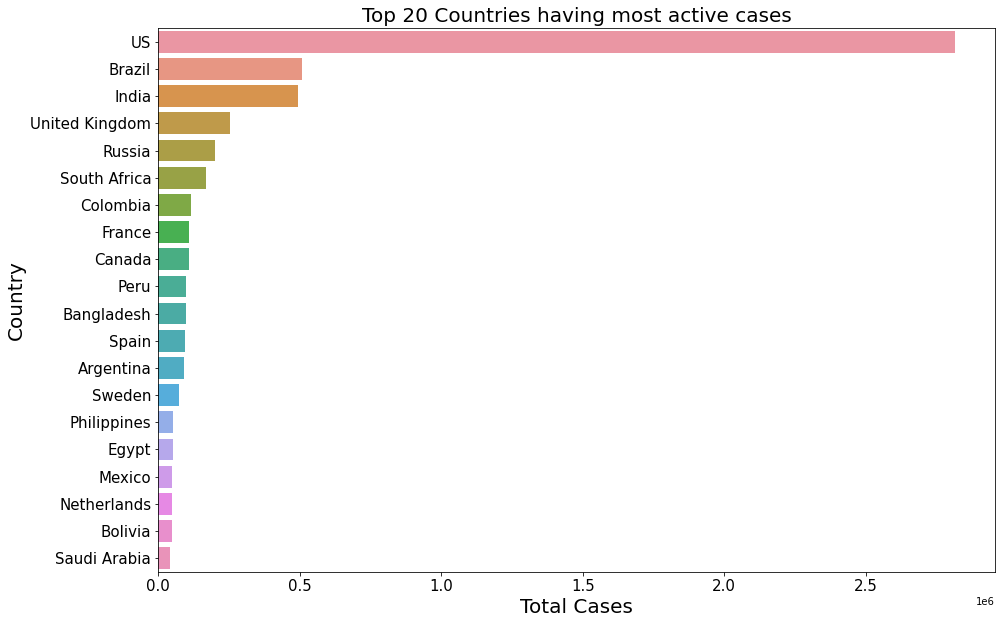

In [14]:
#PLOTTING top 20 active cases country
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=20)
plt.ylabel("Country",fontsize=20)
plt.title("Top 20 Countries having most active cases",fontsize=20)
ax = sns.barplot(x=top_active.active,y=top_active.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

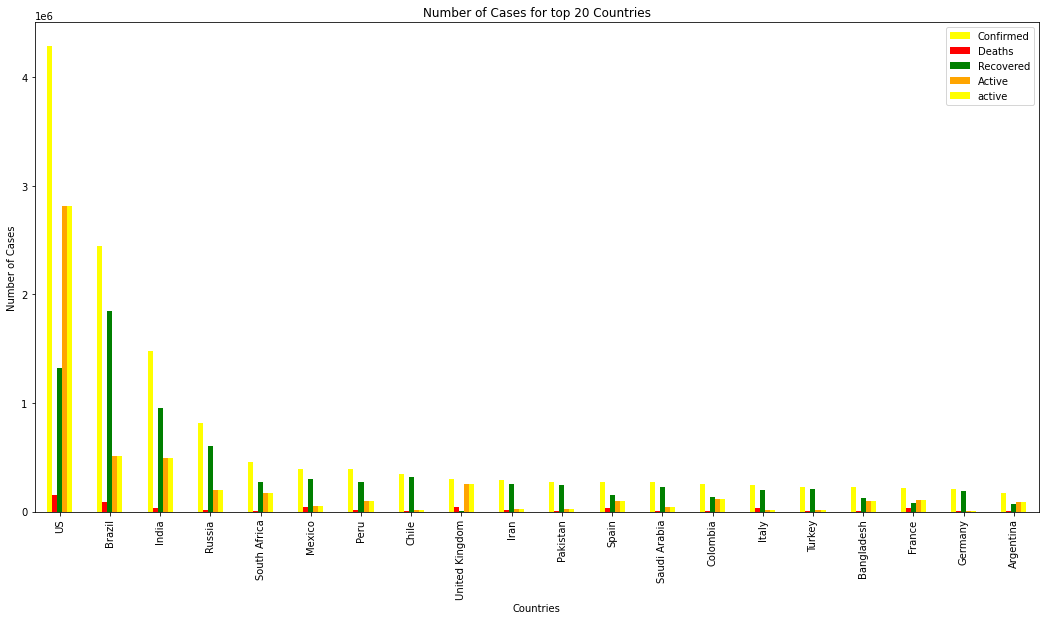

In [15]:
### Sort the top countries by Confirmed cases
top.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top entries
top_countries = top.head(20)
### Show Unstacked Histogram
top_countries.plot(kind='bar', figsize=(18, 9), stacked=False, 
            color=['yellow', 'red', 'green', 'orange'])
plt.title('Number of Cases for top 20 Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.show()